# STAR WARS: ESPÉCIES
## Escolha do modelo

Autor: Rafael Dadão <br>
Data: 07/12/2023 <br>
Objetivo: Escolher um modelo para predição da espécie

## Preprando o ambiente

In [1]:
# Carregando bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score, cross_validate, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
from yellowbrick.model_selection import ValidationCurve, LearningCurve
from yellowbrick.classifier import ClassificationReport
from math import pi
from joblib import dump

## Carregando dataframe

In [2]:
# Carregando dataframe
df = pd.read_csv('df.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hair_color    71 non-null     int64  
 1   skin_color    71 non-null     int64  
 2   specie_human  71 non-null     int64  
 3   imc           71 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 2.3 KB


## Transformações e Manipulações

In [3]:
# Divisão teste e treino
X = df.drop('specie_human', axis=1)
y = df['specie_human']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Preparando o modelo
Comparação de algoritmos:
- Logistic Regression (modelo Base)
- Naive Bayes
- RandomForest
- SVM
- XGBoost

In [4]:
# Lista de modelos para avaliação
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('XG', XGBClassifier()))

In [5]:
# Avaliando cada modelo usando validação cruzada
results = []
names = []
for name, model in models:
    # Configuração da validação cruzada
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f"{name}: Média: {cv_results.mean():.4f}, Desvio Padrão: {cv_results.std():.4f}")

LR: Média: 0.7750, Desvio Padrão: 0.1447
RF: Média: 0.9018, Desvio Padrão: 0.1110
NB: Média: 0.6446, Desvio Padrão: 0.2161
SVM: Média: 0.6089, Desvio Padrão: 0.2523
XG: Média: 0.8304, Desvio Padrão: 0.1251


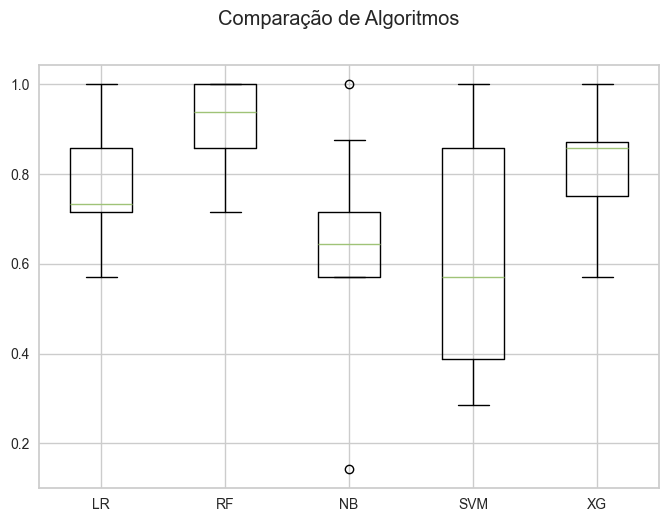

In [6]:
# Criação do gráfico de comparação
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Tunning do RandomForest

In [7]:
# Definindo o modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Especificando múltiplas métricas para avaliação
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'roc_auc']

# Aplicando a validação cruzada com múltiplas métricas
cv_results = cross_validate(model, X, y, cv=10, scoring=scoring)

# Imprimindo os resultados
for metric in scoring:
    print(f"{metric}: Média: {cv_results['test_'+metric].mean():.4f}, Desvio Padrão: {cv_results['test_'+metric].std():.4f}")

c:\Users\dadao\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy: Média: 0.9036, Desvio Padrão: 0.1393
precision_macro: Média: 0.8794, Desvio Padrão: 0.2148
recall_macro: Média: 0.8942, Desvio Padrão: 0.1589
f1_macro: Média: 0.8799, Desvio Padrão: 0.1940
roc_auc: Média: 0.9800, Desvio Padrão: 0.0600


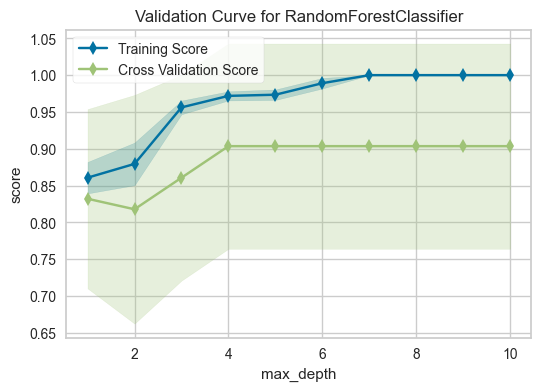

<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>

In [8]:
# Curva de validação
fig, ax = plt.subplots(figsize=(6,4))
vc_viz = ValidationCurve(
    RandomForestClassifier(n_estimators=100, random_state=42),
    param_name="max_depth",
    param_range=np.arange(1,11),
    cv=10
)
vc_viz.fit(X,y)
vc_viz.poof()

à medida que a profundidade máxima das árvores aumenta, a acurácia no conjunto de treinamento aumenta, o que é esperado devido a um melhor ajuste aos dados de treino. No entanto, a acurácia na validação cruzada aumenta até um certo ponto e depois estabiliza, indicando que aumentar a profundidade máxima além desse ponto não resulta em ganhos significativos de generalização e pode até levar a overfitting se a acurácia de treino continuar a aumentar enquanto a de validação diminui ou estagna.

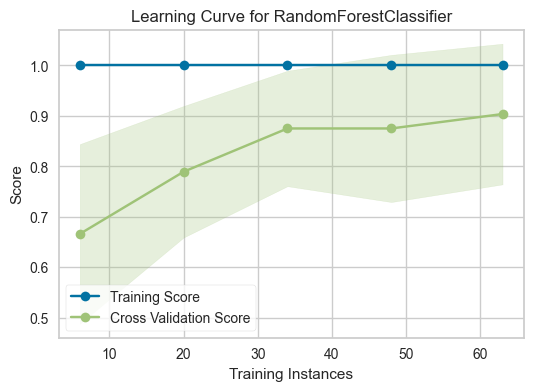

<Axes: title={'center': 'Learning Curve for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [9]:
# Curva de Aprendizagem
fig, ax = plt.subplots(figsize=(6,4))
lc3_viz = LearningCurve(
    RandomForestClassifier(n_estimators=100, random_state=42),
    cv=10
)
lc3_viz.fit(X,y)
lc3_viz.poof()

A pontuação de validação cruzada continua a subir, isso quer dizer que mais dados ajudariam na performance do modelo.
Há alguns pequenos pontos que podem indicar superadequacação (overfitting), mas nada claro.
- A área sobreada entra na pontuação de treino, porém não é um espaço muito grande.
- O desempenho cai razoavelmente do treino para validação
- Há um pouco de variablidade na pontuação da validação, o modelo pode ser complicado demais e estar superadequando (overfitting)

## Modelo RF Base

c:\Users\dadao\miniconda3\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


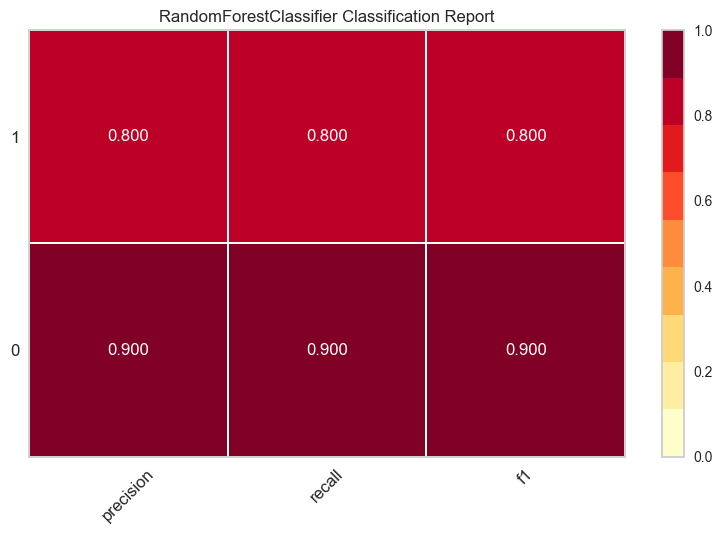

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [10]:
# Modelo base
rf_base = RandomForestClassifier(n_estimators=100, random_state=42)
rf_base.fit(X_train, y_train)

# Avaliação do modelo base usando o Yellowbrick
visualizer_base = ClassificationReport(rf_base, classes=[0,1])
visualizer_base.score(X_test, y_test)
visualizer_base.show()

## Modelo RF Tunning 1

c:\Users\dadao\miniconda3\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


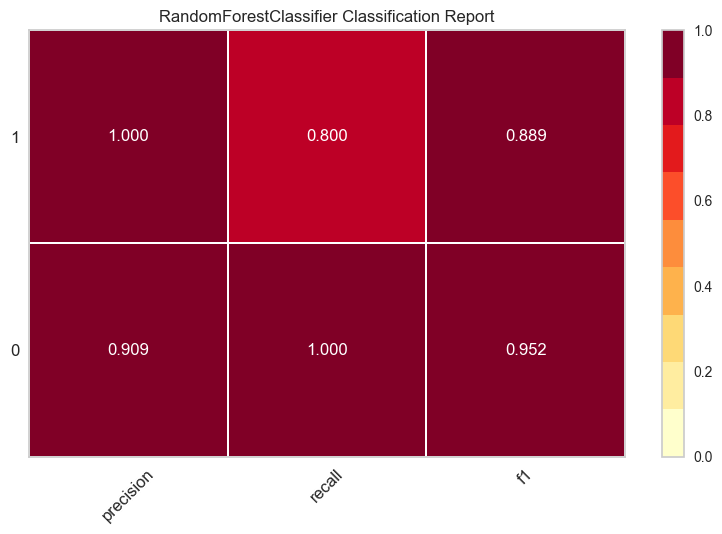

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [11]:
# Modelo tunado
rf_tuned = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    class_weight='balanced',
    criterion='gini',
    random_state=42
)
rf_tuned.fit(X_train, y_train)

# Avaliação do modelo tunado
visualizer_tuned = ClassificationReport(rf_tuned, classes=[0,1])
visualizer_tuned.score(X_test, y_test)
visualizer_tuned.show()

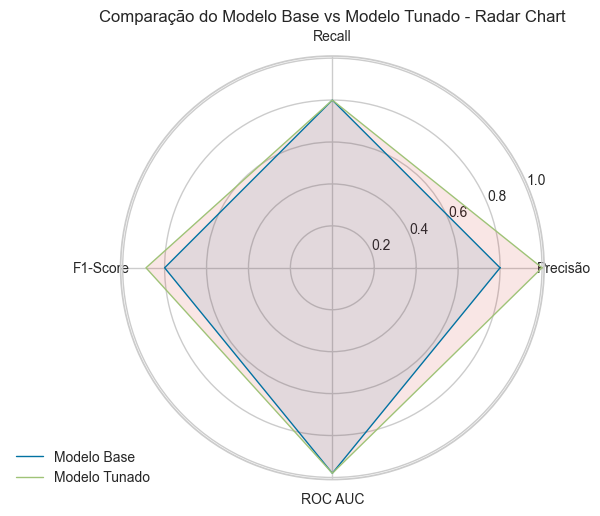

In [14]:
# Comparação entre os modelos

# Função para calcular as métricas
def get_metrics(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_probas = model.predict_proba(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_probas[:, 1])
    
    return [precision, recall, f1, roc_auc]

# Obter métricas para ambos os modelos
metrics_base = get_metrics(rf_base, X_train, X_test, y_train, y_test)
metrics_tuned = get_metrics(rf_tuned, X_train, X_test, y_train, y_test)

# Número de variáveis
num_vars = len(metrics_base)

# Ângulos dos eixos do radar
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Completa o círculo

# Plotagem
fig, ax = plt.subplots(subplot_kw={'polar': True})

# Primeira linha (modelo base)
ax.plot(angles, metrics_base + metrics_base[:1], linewidth=1, linestyle='solid', label='Modelo Base')
ax.fill(angles, metrics_base + metrics_base[:1], 'b', alpha=0.1)

# Segunda linha (modelo tunado)
ax.plot(angles, metrics_tuned + metrics_tuned[:1], linewidth=1, linestyle='solid', label='Modelo Tunado')
ax.fill(angles, metrics_tuned + metrics_tuned[:1], 'r', alpha=0.1)

# Definindo os nomes das métricas no gráfico
ax.set_xticks(angles[:-1])
ax.set_xticklabels(['Precisão', 'Recall', 'F1-Score', 'ROC AUC'])

# Adicionando e configurando o título
plt.title('Comparação do Modelo Base vs Modelo Tunado - Radar Chart')

# Adicionando a legenda
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()

## Salvando o modelo

In [15]:
# Treinando o modelo final
rf_tuned = RandomForestClassifier(n_estimators=200, max_depth=8, class_weight='balanced', criterion='gini', random_state=42)
rf_tuned.fit(X_train, y_train)

# Salvando o modelo em um arquivo para ser chamado
dump(rf_tuned, 'rf_tuned.joblib')


['rf_tuned.joblib']